In [1]:
#Importing Libraries 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('final_features.h5', 'train_df',mode='r')
df_final_test = read_hdf('final_features.h5', 'test_df',mode='r')

In [4]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_dot_u', 'pre_att_followers', 'pre_att_followees', 'svd_dot_v'],
      dtype='object')

In [5]:
df_final_train.shape
df_final_train.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,svd_dot_u,pre_att_followers,pre_att_followees,svd_dot_v
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,-1.355368e-12,4.675244e-13,1.128586e-06,6.616651e-14,9.771075e-13,4.160011e-14,1.114847e-11,0,0,2.238769e-12
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,1.244974e-12,-1.636948e-10,-3.112787e-10,6.738902e-02,2.607836e-11,2.372900e-09,3.192812e-03,0,0,9.068719e-04
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-5.168530e-18,-7.196353e-18,-1.020720e-17,1.512531e-17,7.660428e-18,-8.195645e-19,4.001379e-33,0,0,5.753505e-34
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,-9.818087e-10,3.454679e-11,5.213566e-08,9.595758e-13,3.047045e-10,1.246586e-13,4.710299e-20,0,0,3.159464e-18
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,-3.453513e-15,1.121296e-15,3.097683e-09,8.173276e-16,1.122948e-15,5.095796e-17,7.775076e-14,0,0,3.708786e-16


In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [8]:
#XGboost
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

In [72]:
import numpy as np
max_depth = np.arange(1,10,1)
print(max_depth)
n_estimators = np.arange(100,200,2)
print(n_estimators)


[1 2 3 4 5 6 7 8 9]
[100 102 104 106 108 110 112 114 116 118 120 122 124 126 128 130 132 134
 136 138 140 142 144 146 148 150 152 154 156 158 160 162 164 166 168 170
 172 174 176 178 180 182 184 186 188 190 192 194 196 198]


In [19]:
import pandas as pd
#import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate  #Additional scklearn functions
from sklearn.model_selection import RandomizedSearchCV   #Perforing grid search

params1 =  {"learning_rate" : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
             "max_depth": np.arange(1,10,1),
            "n_estimators": np.arange(100,200,2) }

train_scores = []
test_scores = []

xg1 = XGBClassifier(objective = 'binary:logistic',verbosity = 1, eval_metric = 'auc',scale_pos_weight=1, random_state=1)

rf_random1 = RandomizedSearchCV(xg1, param_distributions=params1,verbose = 2,
                                   n_iter=5,cv=5,scoring='f1',random_state=25,return_train_score=True)
#originally tried cv=10 took longer time to execute. 
rf_random1.fit(df_final_train,y_train)
print('mean test scores',rf_random1.cv_results_['mean_test_score'])
print('mean train scores',rf_random1.cv_results_['mean_train_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..learning_rate=0.15, max_depth=6, n_estimators=112; total time=  20.2s
[CV] END ..learning_rate=0.15, max_depth=6, n_estimators=112; total time=  22.3s
[CV] END ..learning_rate=0.15, max_depth=6, n_estimators=112; total time=  21.9s
[CV] END ..learning_rate=0.15, max_depth=6, n_estimators=112; total time=  21.8s
[CV] END ..learning_rate=0.15, max_depth=6, n_estimators=112; total time=  22.1s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=136; total time=  28.6s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=136; total time=  28.4s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=136; total time=  28.6s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=136; total time=  28.6s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=136; total time=  28.3s
[CV] END ...learning_rate=0.3, max_depth=6, n_estimators=144; total time=  29.8s
[CV] END ...learning_rate=0.3, max_depth=6, n_est

In [29]:
print("---------------OUTPUT FROM FIRST-------------")
l_r = rf_random1.best_params_['learning_rate']
m_d = rf_random1.best_params_['max_depth']
n_e = rf_random1.best_params_['n_estimators']
print(rf_random1.best_estimator_)
print("The best learning rate determined from params 1 is ",rf_random1.best_params_)
print("Best Score",rf_random1.best_score_)
print("-"*70)

---------------OUTPUT FROM FIRST-------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=144, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=1)
The best learning rate determined from params 1 is  {'n_estimators': 144, 'max_depth': 6, 'learning_rate': 0.3}
Best Score 0.9827824504483378
----------------------------------------------------------------------


In [ ]:
#A List of all parameteres that can be fine-tuned. Values researched after looking up online at above links and more online(towards data science on XgBoost)
min_child_weight = range(1,6,2)
gamma = [i/10.0 for i in range(0,5)]
max_depth = range(3,10,2),
min_child_weight = range(1,6,2)
subsample = [i/100.0 for i in range(75,90,5)],
colsample_bytree= [i/100.0 for i in range(75,90,5)]
   
reg_alpha= [0, 0.001, 0.005, 0.01, 0.05]
reg_lamda = [0,0.0001, 0.001, 0.005, 0.01, 0.05]  # SHOWED ERROR WHEN USED.

In [30]:
min_child_weigh = range(1,6,2)
print(min_child_weigh)
subsample = [i/100.0 for i in range(75,90,5)]
print("subsample",subsample)
colsample_bytree = [i/100.0 for i in range(75,90,5)] 
print("colsample_bytree",colsample_bytree)

range(1, 6, 2)
subsample [0.75, 0.8, 0.85]
colsample_bytree [0.75, 0.8, 0.85]


In [34]:

params2 =  {"min_child_weight":range(1,6,2),
             "subsample":[i/100.0 for i in range(75,90,5)],
            "colsample_bytree":[i/100.0 for i in range(75,90,5)] }


xg2 = XGBClassifier(objective = 'binary:logistic',n_estimators= n_e, max_depth = m_d, learning_rate = l_r ,
                    verbosity = 1, eval_metric = 'auc',scale_pos_weight=1, random_state=1)

rf_random2 = RandomizedSearchCV(xg2, param_distributions=params2,verbose = 2,
                                   n_iter=5,cv=5,scoring='f1',random_state=25,return_train_score=True)
#originally tried cv=10 took longer time to execute. 
rf_random2.fit(df_final_train,y_train)
print('mean test scores',rf_random2.cv_results_['mean_test_score'])
print('mean train scores',rf_random2.cv_results_['mean_train_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END colsample_bytree=0.75, min_child_weight=1, subsample=0.85; total time=  13.9s
[CV] END colsample_bytree=0.75, min_child_weight=1, subsample=0.85; total time=  14.3s
[CV] END colsample_bytree=0.75, min_child_weight=1, subsample=0.85; total time=  20.0s
[CV] END colsample_bytree=0.75, min_child_weight=1, subsample=0.85; total time=  24.2s
[CV] END colsample_bytree=0.75, min_child_weight=1, subsample=0.85; total time=  26.1s
[CV] END colsample_bytree=0.8, min_child_weight=1, subsample=0.8; total time=  25.8s
[CV] END colsample_bytree=0.8, min_child_weight=1, subsample=0.8; total time=  24.4s
[CV] END colsample_bytree=0.8, min_child_weight=1, subsample=0.8; total time=  24.0s
[CV] END colsample_bytree=0.8, min_child_weight=1, subsample=0.8; total time=  24.1s
[CV] END colsample_bytree=0.8, min_child_weight=1, subsample=0.8; total time=  24.1s
[CV] END colsample_bytree=0.85, min_child_weight=3, subsample=0.75; total time= 

In [36]:
print("---------------OUTPUT FROM SECOND-------------")
m_c_w = rf_random2.best_params_['min_child_weight']
s_s = rf_random2.best_params_['subsample']
c_b = rf_random2.best_params_['colsample_bytree']
print(rf_random2.best_estimator_)
print("The best learning rate determined from params 2 is ",rf_random2.best_params_)
print("Best Score",rf_random2.best_score_)
print("-"*70)

---------------OUTPUT FROM SECOND-------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=144, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=1)
The best learning rate determined from params 2 is  {'subsample': 0.8, 'min_child_weight': 1, 'colsample_bytree': 0.8}
Best Score 0.9828629785952081
----------------------------------------------------------------------


In [41]:
params3 =  {"reg_alpha": [0, 0.0001, 0.001, 0.005, 0.01, 0.05] }
#Tried reg_lambda but showed error

xg3 = XGBClassifier(objective = 'binary:logistic',n_estimators= n_e, max_depth = m_d, learning_rate = l_r ,
                    subsample =s_s, min_child_weight = m_c_w, colsample_bytree = c_b ,
                    verbosity = 1, eval_metric = 'auc',scale_pos_weight=1, random_state=1)

rf_random3 = RandomizedSearchCV(xg3, param_distributions=params3,verbose = 2,
                                   n_iter=5,cv=5,scoring='f1',random_state=25,return_train_score=True)
#originally tried cv=10 took longer time to execute. 
rf_random3.fit(df_final_train,y_train)
print('mean test scores',rf_random3.cv_results_['mean_test_score'])
print('mean train scores',rf_random3.cv_results_['mean_train_score'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .....................................reg_alpha=0.05; total time=  22.8s
[CV] END .....................................reg_alpha=0.05; total time=  24.7s
[CV] END .....................................reg_alpha=0.05; total time=  23.9s
[CV] END .....................................reg_alpha=0.05; total time=  24.0s
[CV] END .....................................reg_alpha=0.05; total time=  23.9s
[CV] END ........................................reg_alpha=0; total time=  23.7s
[CV] END ........................................reg_alpha=0; total time=  23.9s
[CV] END ........................................reg_alpha=0; total time=  23.8s
[CV] END ........................................reg_alpha=0; total time=  24.1s
[CV] END ........................................reg_alpha=0; total time=  23.8s
[CV] END ...................................reg_alpha=0.0001; total time=  23.9s
[CV] END ...................................reg_a

In [45]:
print("---------------OUTPUT FROM THIRD-------------")
r_a = rf_random3.best_params_["reg_alpha"]

print(rf_random3.best_estimator_)
print("The best learning rate determined from params 3 is ",rf_random3.best_params_)
print("Best Score",rf_random3.best_score_)
print("-"*70)

---------------OUTPUT FROM THIRD-------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=144, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=1)
The best learning rate determined from params 2 is  {'reg_alpha': 0}
Best Score 0.9828629785952081
----------------------------------------------------------------------


In [57]:
final_clf = XGBClassifier(objective = 'binary:logistic',n_estimators= n_e, max_depth = m_d, learning_rate = l_r ,
                    subsample =s_s, min_child_weight = m_c_w, colsample_bytree = c_b , reg_alpha=r_a,                    
                    verbosity = 1, eval_metric = 'auc',scale_pos_weight=1, random_state=1)

In [58]:
final_clf.fit(df_final_train,y_train)
y_train_pred = final_clf.predict(df_final_train)
y_test_pred = final_clf.predict(df_final_test)

In [59]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9988602279544091
Test f1 score 0.909628287273747


In [60]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


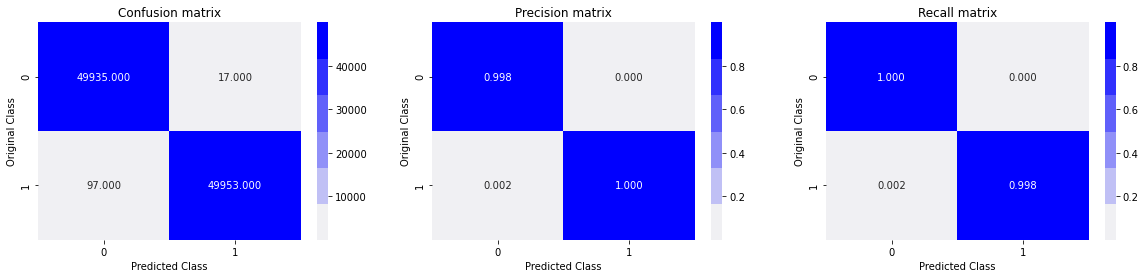

Test confusion_matrix


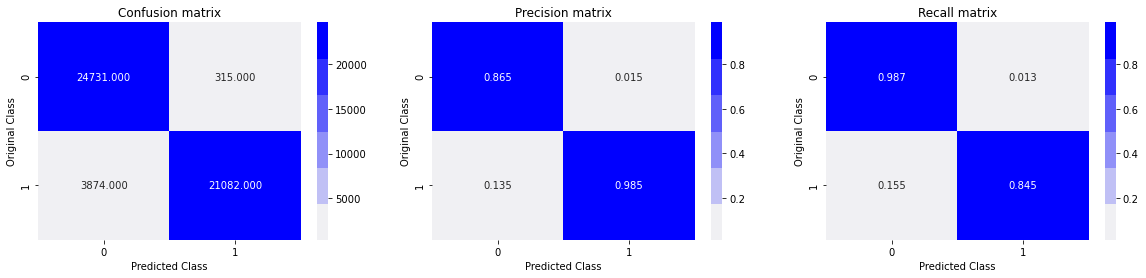

In [61]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

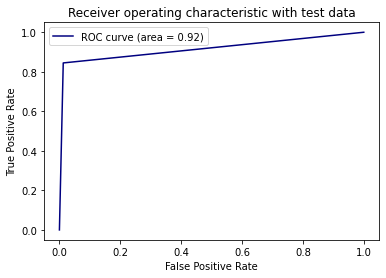

In [62]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

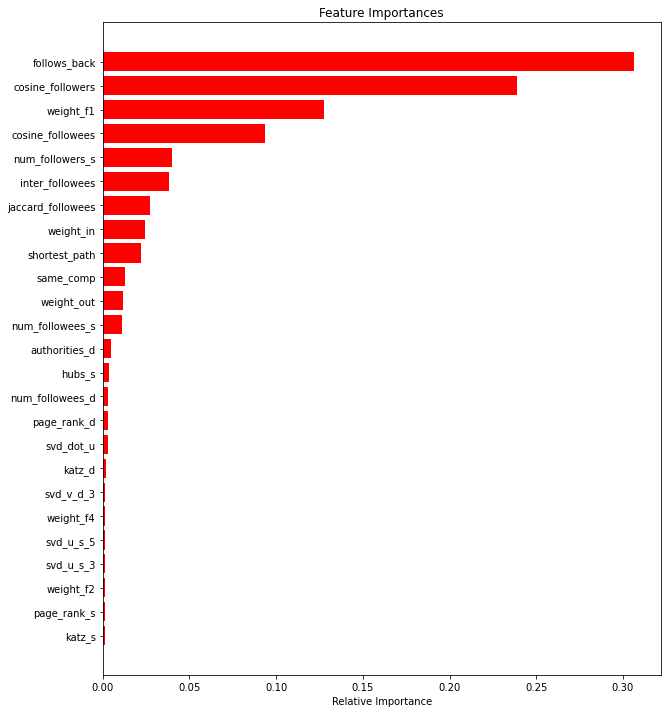

In [64]:
features = df_final_train.columns
importances = final_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [69]:
 pip install -U prettytable


Note: you may need to restart the kernel to use updated packages.


In [71]:
from prettytable import PrettyTable
x = PrettyTable()

p = PrettyTable()
p.field_names = ["MODEL","train f1-score","test f1-score"]
p.add_row(["Random Forest(previously done)",0.96,0.92])
p.add_row(["Xgboost",0.99,0.91])

print(p)

+--------------------------------+----------------+---------------+
|             MODEL              | train f1-score | test f1-score |
+--------------------------------+----------------+---------------+
| Random Forest(previously done) |      0.96      |      0.92     |
|            Xgboost             |      0.99      |      0.91     |
+--------------------------------+----------------+---------------+
